## Project: Predicting Good or Bad Customers for Granting Credit

### Created & Submitted by: Arjun Baidya

### Program: Applied Data Science & Machine Learning with Python by E&ICT Academy, IIT Roorkee 

### Project Brief

The banks with the intention of increasing the number of customers using their credit service were more focused on growing this segment, but the drawback was that many customers who were given credit were not able to pay back the credit on time, and this became a concerning  issue soon. A system was required to effectively decide which customers were worthy of being granted credit based on his/her previous credit history.

### Objective

Build a classification model using Logistic Regression to predict if a customer should be granted credit or not, so that the bank can minimize its risk and maximize its profit. Compare it with another algorithm of your choice.
Dataset:Source(https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)


<a id='eda'></a>
## 1. Importing the dataset and necessary modules

In [1]:
# Importing required modules

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Credit_Card_Default.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<a id='eda'></a>
## 2. Exploratory Data Analysis (EDA)

<a id='feat'></a>
### 2.1 Feature Analysis

<br> The dataset has **30000 observations** that represent distinct credit card clients. Each observation has **24 attributes** that contain information on payment defaults, demographic information, credit information, history of payments, and bill statements of credit card customers.

The first group of variables contains information about the **Customer's personal information**:

1. `ID`: ID of each client, categorical variable
2. `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
3. `SEX`: Gender, categorical variable (1=male, 2=female)
4. `EDUCATION`: level of education, categorical variable (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. `MARRIAGE`: Marital status, categorical variable (1=married, 2=single, 3=others)
6. `AGE`: Age in years, numerical variable

The following attributes contains information about the **Past payment** referred to a specific month:

7. `PAY_0`: Repayment status in September 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. `PAY_2`: Repayment status in August 2005 (same scale as before)
9. `PAY_3`: Repayment status in July 2005 (same scale as before)
10. `PAY_4`: Repayment status in June 2005 (same scale as before)
11. `PAY_5`: Repayment status in May 2005 (same scale as before)
12. `PAY_6`: Repayment status in April 2005 (same scale as before)

The following attributes contains information related to the **Amount of bill statement**:

13. `BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)
14. `BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)
15. `BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)
16. `BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)
17. `BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)
18. `BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)

The following attributes contains information related to the **Amount of previous payment** in a specific month:

19. `PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)
20. `PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)
21. `PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)
22. `PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)
23. `PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)
24. `PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)

The last variable is the one to be predicted(Target variable):

25. `default.payment.next.month`: indicate whether the credit card holders are defaulters or non-defaulters (1=yes, 0=no)

The main aim is to predict the credibility of the customer, in order to minimize the risk and maximize the profit of a bank. This means predict whether a customer is likely to default next month or not default next month.

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


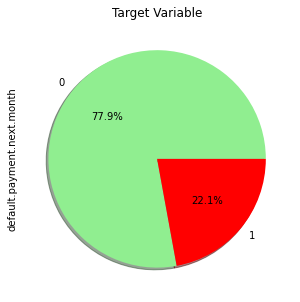

In [3]:
# Target variable class distribution

print(data['default.payment.next.month'].value_counts())
pd.value_counts(data['default.payment.next.month']).plot(kind='pie',
                                                         y='Default_payment',
                                                         title='Target Variable',
                                                         colors = ['lightgreen', 'red'],
                                                         shadow=True,
                                                         figsize=(5,5),
                                                         autopct='%1.1f%%');

**This is a binary classification problem on a relatively unbalanced dataset, as seen in the above figure.**

In [4]:
# Checkiing data types of the feature variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
# Check for missing values

data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

**There are no missing values**

In [6]:
# Descriptive Statistics

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [8]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

The following oddities can be observed: 
- The column `PAY_0` should be renamed as `PAY_1` in-sync with other 'PAY_n' features;
- In `EDUCATION` and `MARRIAGE` features there are some undocumented categories;
- The columns `PAY_n` have a minimum of -2 (undocumented) and a maximum of 8.

So, it is likely that these attributes need to be sanitized.
<a id='data_cleaning'></a>
### 2.2 Data Cleaning

The presence of issues in the dataset can be addressed in 2 ways: 
1. By deleting of the rows associated with an error (paying attention to the number of lines with respect to the total number of observations)
2. By correcting the wrong attributes

In our case the first method is applied to the categorical variables, by safely removing the unknown categories (since the total number of anomalous values are 399):
- Regarding the feature `EDUCATION` there are 3 categories not listed in the description of the dataset provided by the project dataset description and the UCI website that corresponds to 0, 5, and 6.
- For `MARRIAGE` we can notice the presence of category 0 that does not correspond to any categories previously described.

While the second approach is applied to the `PAY_n` features, correcting them by adding 1 to each attribute and grouping together the resulting values of '0' and '-1' (since 0 does not correspond to any value previously described).

In [9]:
# Renaming variable 'PAY_0' to 'PAY_1' 
data.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

# Renaming target variable: 'default.payment.next.month' to 'Default'
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)

# Dropping first attribute "ID" since it is of no predictive value
data.drop('ID', axis = 1, inplace =True)

# Changing Target variable from integer type to category type
data["Default"] = data["Default"].astype('category')

In [10]:
# In MARRAIGE, category '0' is undocumented so deleting
data = data.drop(data[data['MARRIAGE']==0].index)

# In EDUCATION, categories 0, 5 and 6 are unknown therefore deleting these
data = data.drop(data[data['EDUCATION']==0].index)
data = data.drop(data[data['EDUCATION']==5].index)
data = data.drop(data[data['EDUCATION']==6].index)

In [11]:
print('Number of observation post data cleaning:', len(data))

Number of observation post data cleaning: 29601


In [12]:
# Target variable distribution post data cleaning
data['Default'].value_counts()

0    22996
1     6605
Name: Default, dtype: int64

In [13]:
# Payment delay description
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [14]:
# REPAYMENT STATUS = -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ...
# 8=payment delay for eight months, 9=payment delay for nine months and above

for att in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']: 
   print(f"# {att} -------")
   print(data[att].value_counts())

# PAY_1 -------
 0    14499
-1     5633
 1     3662
-2     2708
 2     2640
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
# PAY_2 -------
 0    15476
-1     5990
 2     3904
-2     3722
 3      326
 4       97
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
# PAY_3 -------
 0    15518
-1     5863
-2     4027
 2     3802
 3      237
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
# PAY_4 -------
 0    16204
-1     5617
-2     4287
 2     3142
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64
# PAY_5 -------
 0    16684
-1     5480
-2     4479
 2     2617
 3      177
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
# PAY_6 -------
 0    16053
-1     5674
-2     4806
 2     2756
 3      183
 4       49
 7       46
 6       19
 5       13
 8        2
Name: 

In [15]:
# since PAY_n can take as values only -1,1,2,3,4,5,6,7,8,9

for att in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  # categories -2,-1 are grouped into a single class -1: pay duty   
  filter = (data[att] == -2) | (data[att] == -1) 
  data.loc[filter, att] = -1

  # moreover the category 0 is undocumented
  # so each category >= 0 has been updated by adding 1
  data[att] = data[att].astype('int64')
  filter = (data[att] >= 0)
  data.loc[filter, att] = data.loc[filter, att] + 1


In [16]:
# Payment delay description
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,0.794770,0.666329,0.638492,0.591939,0.550894,0.520759
std,1.339224,1.397190,1.389153,1.350751,1.309342,1.325013
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


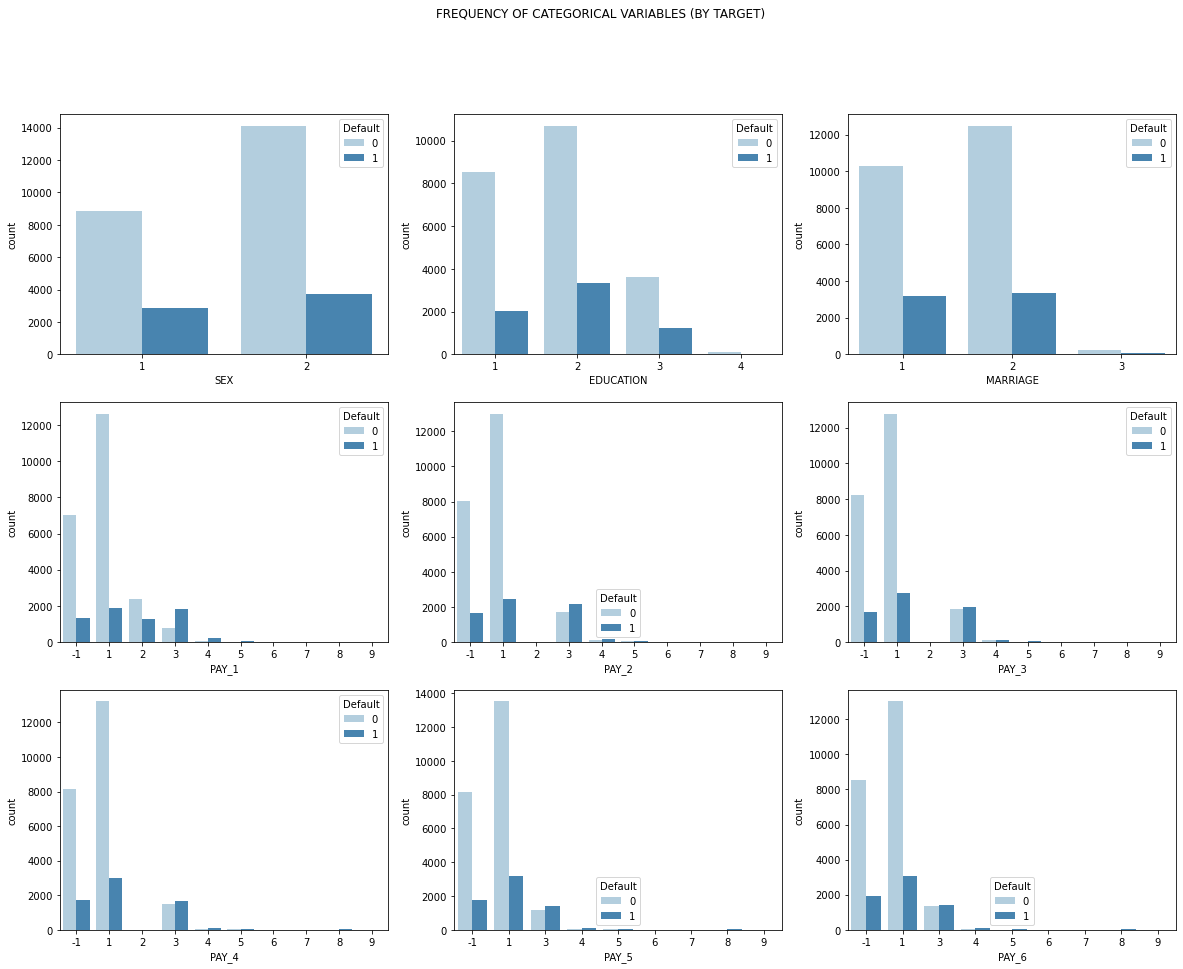

In [17]:
# Creating a new dataframe with categorical variables
subset = data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_1", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2]);

In [18]:
# Bill Statement description
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000
mean,50957.432012,48942.189554,4.680320e+04,43122.554204,40235.545184,38858.449816
std,73370.242404,70923.985151,6.912389e+04,64196.383913,60699.344884,59519.893043
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3528.000000,2970.000000,2.652000e+03,2329.000000,1780.000000,1278.000000
50%,22259.000000,21050.000000,2.003500e+04,19005.000000,18091.000000,17118.000000
75%,66623.000000,63497.000000,5.983000e+04,54271.000000,50072.000000,49121.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [19]:
# Previous Payment Description
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000
mean,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374
std,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000
50%,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [20]:
# Limit Balance feature descriptive statistics
data['LIMIT_BAL'].describe()

count      29601.000000
mean      167550.544914
std       129944.020953
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

**Standard deviation value is very high so further investion is required.**

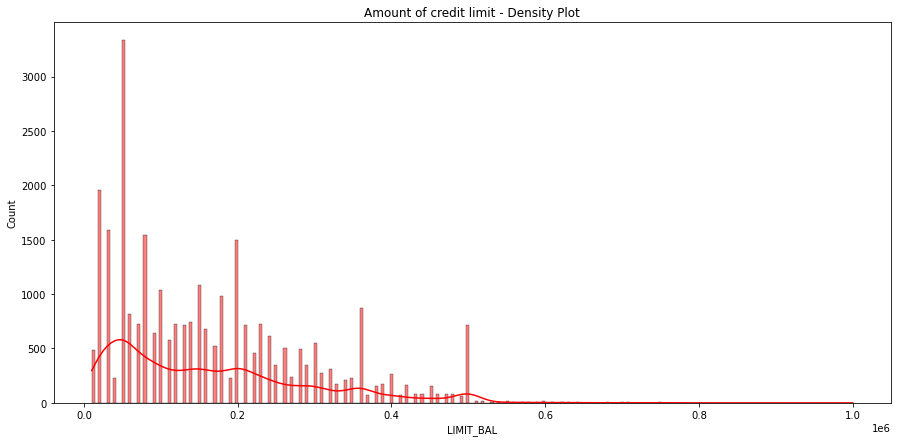

In [21]:
plt.figure(figsize = (15,7))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.histplot(data['LIMIT_BAL'], kde=True, bins=250, color="red")
plt.show()

In [22]:
data['LIMIT_BAL'].value_counts().head(10)

50000.0     3331
20000.0     1955
30000.0     1586
80000.0     1542
200000.0    1498
150000.0    1080
100000.0    1035
180000.0     979
360000.0     872
60000.0      819
Name: LIMIT_BAL, dtype: int64

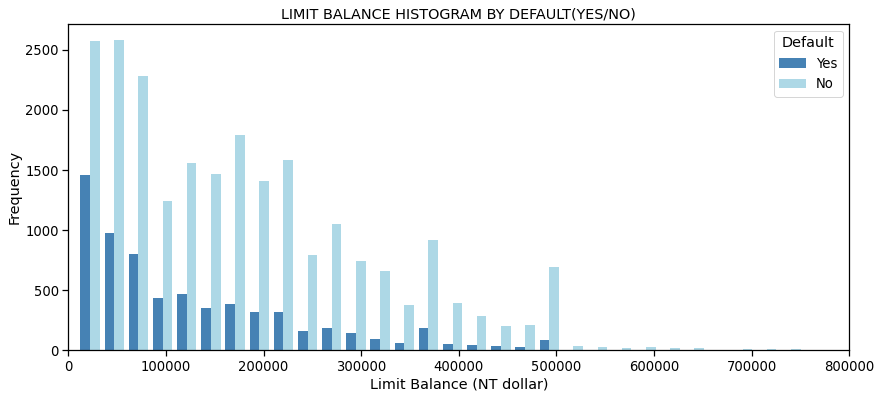

In [23]:
x1 = list(data[data['Default'] == 1]['LIMIT_BAL'])
x2 = list(data[data['Default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(14,6))
sns.set_context('notebook', font_scale=1.2)
sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,800000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY DEFAULT(YES/NO)')
plt.show();

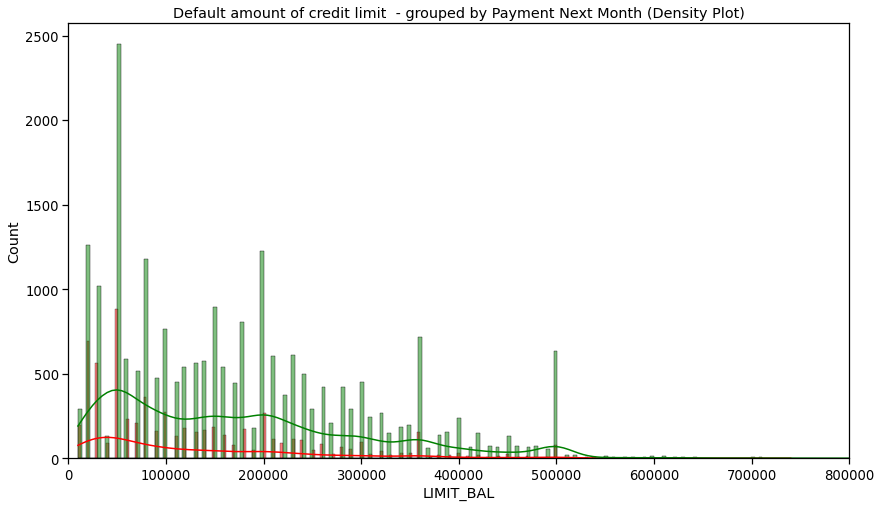

In [24]:
class_1 = data.loc[data['Default'] == 1]["LIMIT_BAL"]
class_0 = data.loc[data['Default'] == 0]["LIMIT_BAL"]
plt.figure(figsize = (14,8))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
plt.xlim([0,800000])
sns.histplot(class_1,kde=True,bins=250, color="red")
sns.histplot(class_0,kde=True,bins=250, color="green");

As can be seen, most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults).

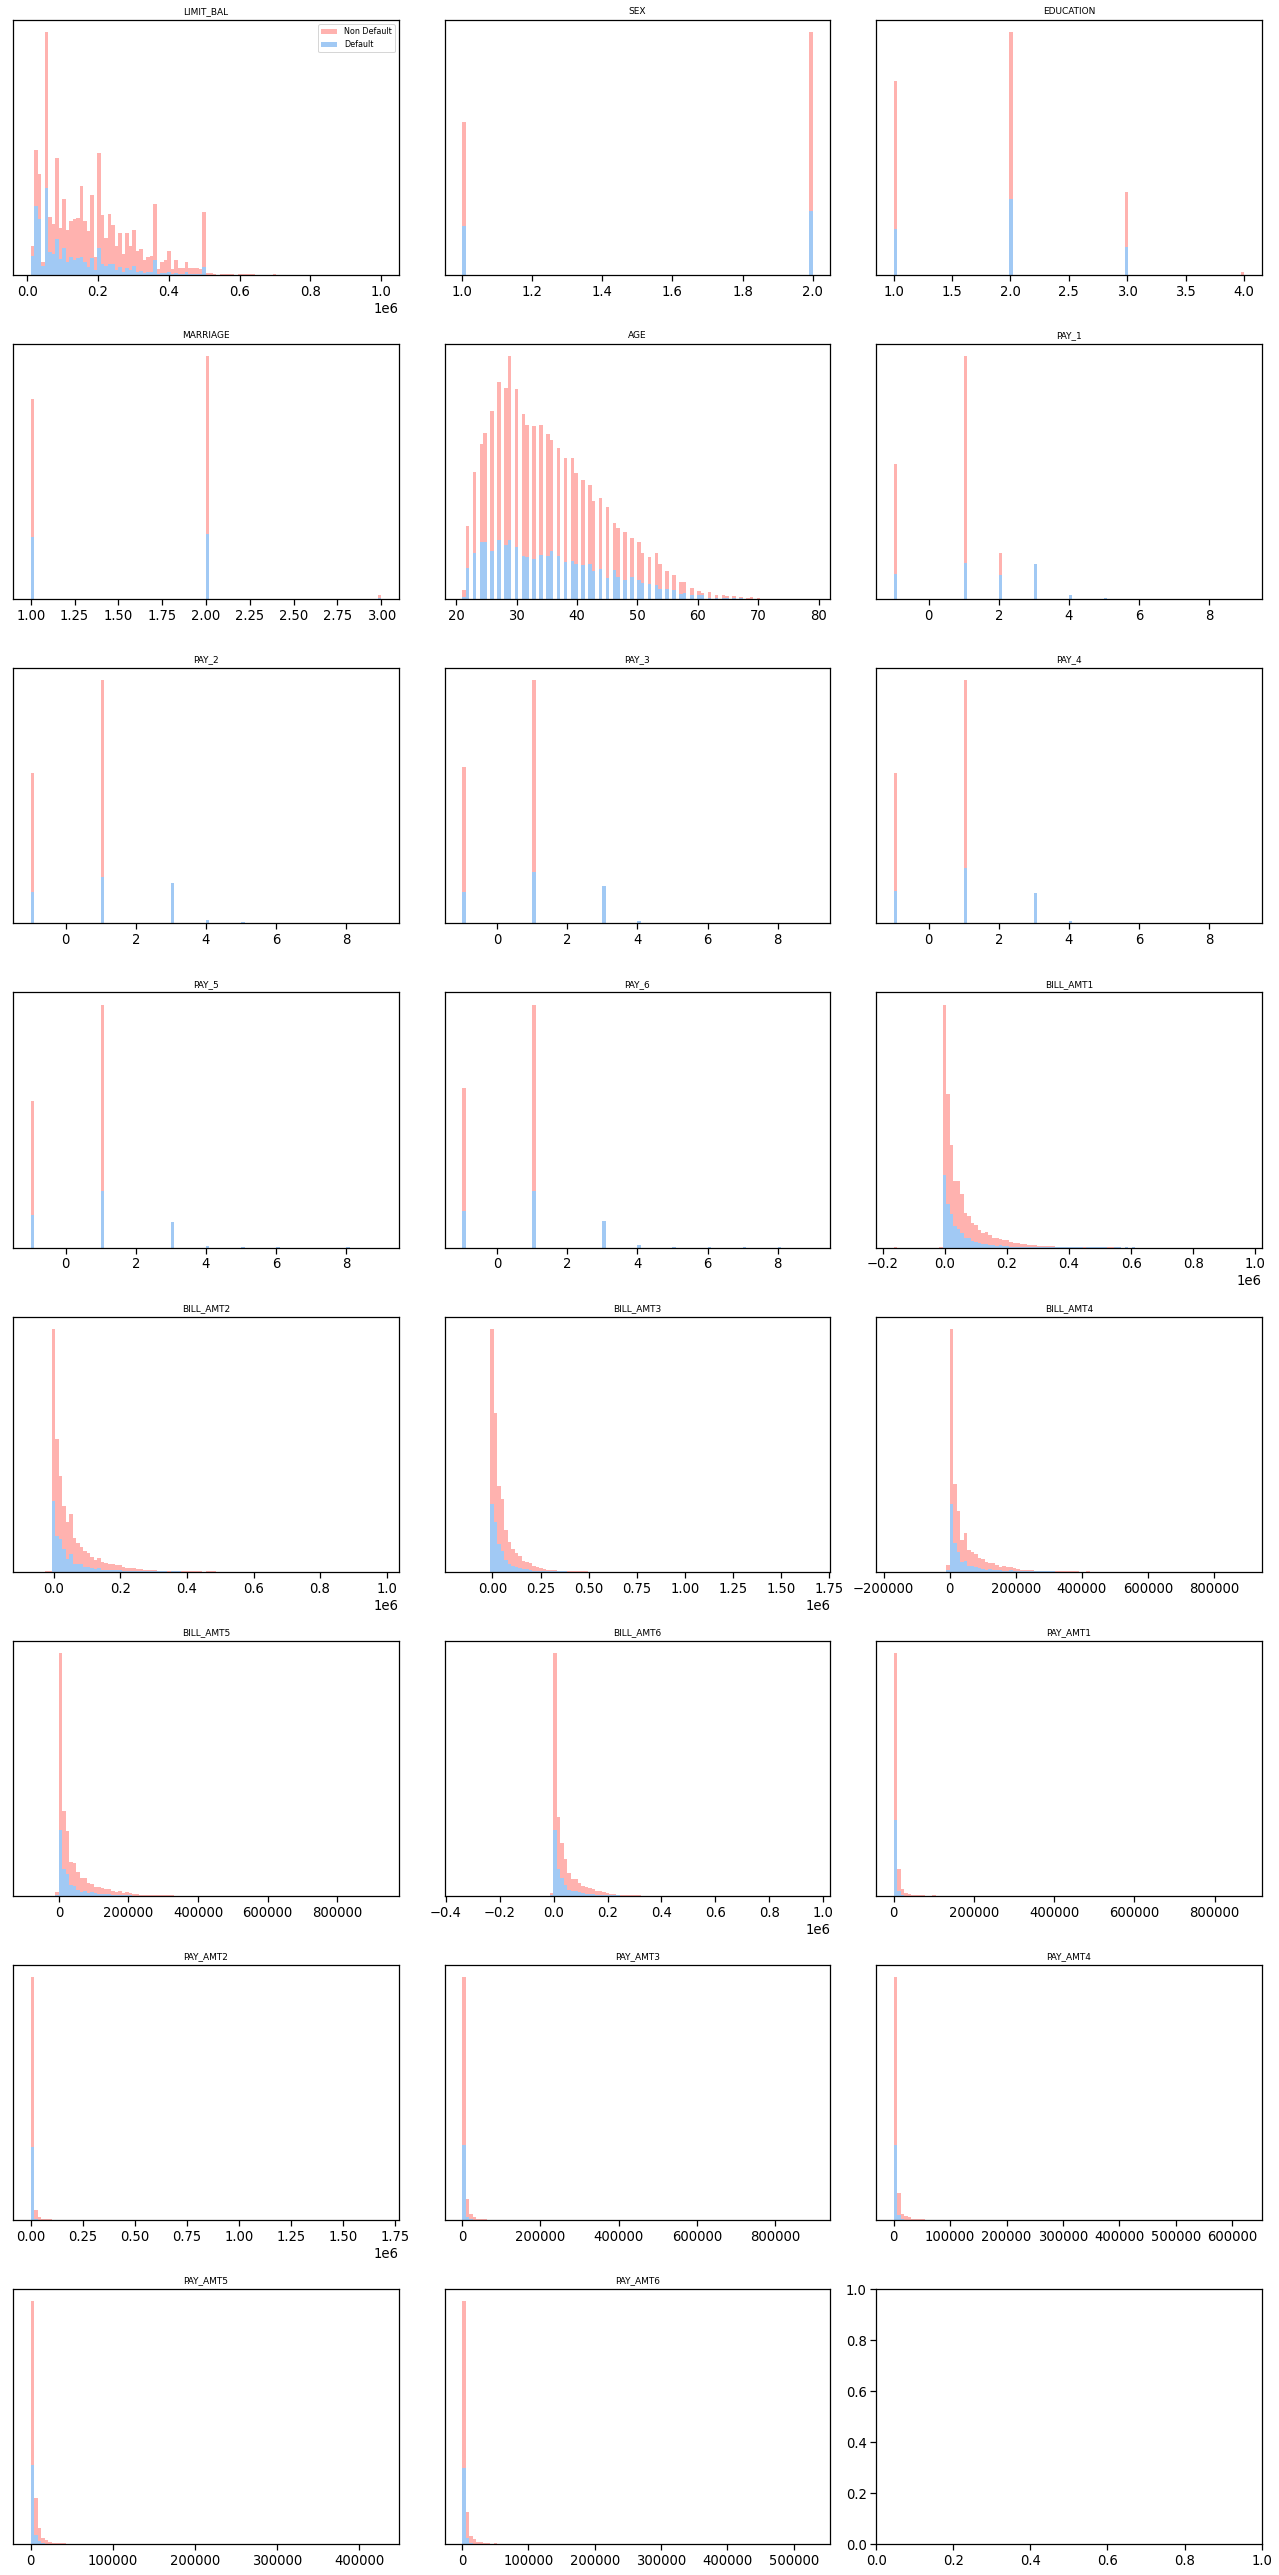

In [25]:
# HISTOGRAMS PLOTS OF FEATURES

fig, axes= plt.subplots(8,3,figsize=(18,36))
non_def = data[data.Default==0]
default = data[data.Default==1]
ax = axes.ravel()

for i,label in enumerate(data.columns[:-1]):
    _,bins = np.histogram(data[label],bins=100)
    ax[i].hist(non_def[label],bins=bins,color='r',alpha=0.8) # red color for non default class
    ax[i].hist(default[label],bins=bins,color='b',alpha=1) # alpha is for transparency in the overlapped region
    ax[i].set_title(data.columns[i],fontsize=9)
    ax[i].axes.get_xaxis().set_visible(True) # we just want to look how well separated the histograms are
    ax[i].set_yticks(())

ax[0].legend(['Non Default','Default'],loc='best',fontsize=8)
plt.tight_layout()

<a id='corr'></a>
### 2.3 Correlation between features
Another relevant point which could affect the classification performances is the correlation among features: the presence of strongly correlated features may lead to a decline in the performances of some classification algorithms which assume that the predictors are all independent. Another benefit from spotting correlation among features is that the same information may be encoded with less attributes, and this could lead to simpler final models. Indeed, some methods suffer from high dimensional datasets (especially distance based ones with a few number of samples), so reducing the dimensions of the feature vectors can make it more trustable and stable, if the discarded dimensions don’t affect significantly the total original information.

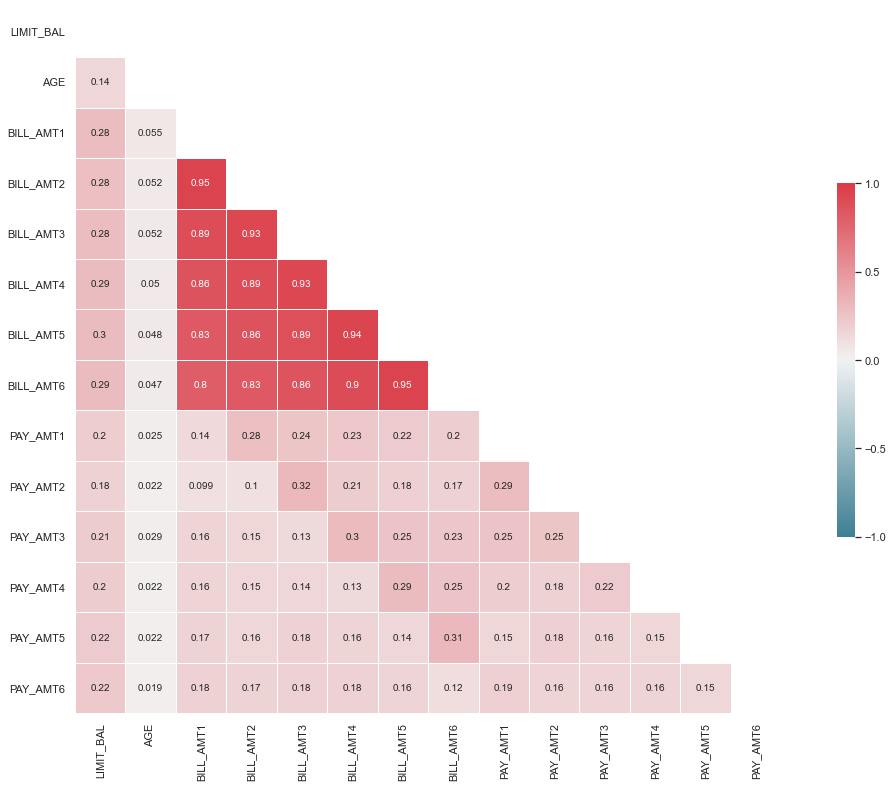

In [26]:
# Correlation matrix
sns.set(style="white", font_scale=1)
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
           'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
corr = data[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])

As shown in the correlation matrix above, some features show high correlations with each other. In particular, there exist an high positive correlation among the `BILL_AMTn` features, for example:

- BILL_AMT1 and BILL_AMT2 have $\rho = 0.95$
- BILL_AMT2 and BILL_AMT3 have $\rho = 0.93$
- BILL_AMT4 and BILL_AMT5 have $\rho = 0.94$

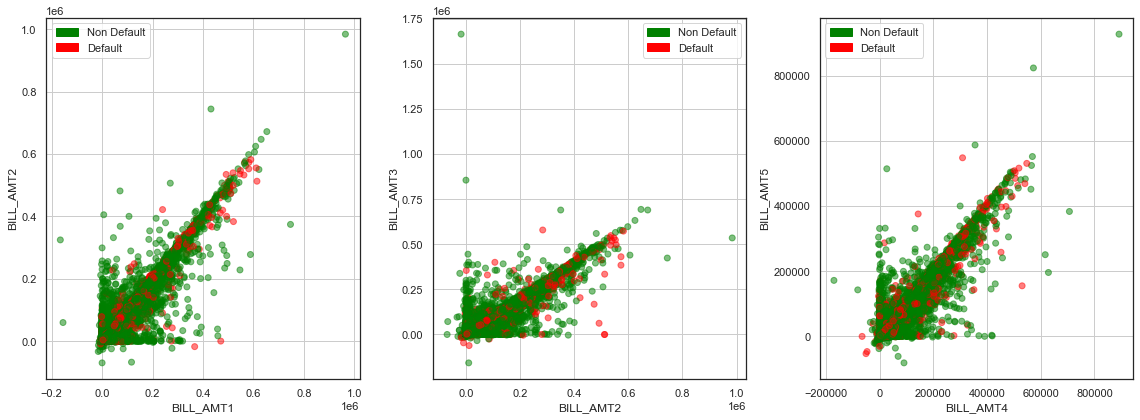

In [27]:
# Distribution of correlated features -- scatter plots
import matplotlib.patches as mpatches

data_np=data.to_numpy()
target=data.Default

# variables to 
BILL_AMT1 = data['BILL_AMT1'].to_numpy()
BILL_AMT2 = data['BILL_AMT2'].to_numpy()
BILL_AMT3 = data['BILL_AMT3'].to_numpy()
BILL_AMT4 = data['BILL_AMT4'].to_numpy()
BILL_AMT5 = data['BILL_AMT5'].to_numpy()
BILL_AMT6 = data['BILL_AMT6'].to_numpy()
AGE = data['AGE'].to_numpy()
LIMIT_BAL = data['LIMIT_BAL'].to_numpy()
PAY_AMT1 = data['PAY_AMT1'].to_numpy()

fig, ax = plt.subplots(1,3, figsize= (16,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='green', label='Non Default')
pop_b = mpatches.Patch(color='red', label='Default')
colors=['green', 'red']

ax[0].scatter(BILL_AMT1, BILL_AMT2, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('BILL_AMT1')
ax[0].set_ylabel('BILL_AMT2')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(BILL_AMT2, BILL_AMT3, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('BILL_AMT2')
ax[1].set_ylabel('BILL_AMT3')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(BILL_AMT4,BILL_AMT5, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('BILL_AMT4')
ax[2].set_ylabel('BILL_AMT5')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()
plt.show()

The charts confirm what expected, the features in the same graph shows a linear trend as the Pearson coefficient suggested, indicating they encode pretty similar information.

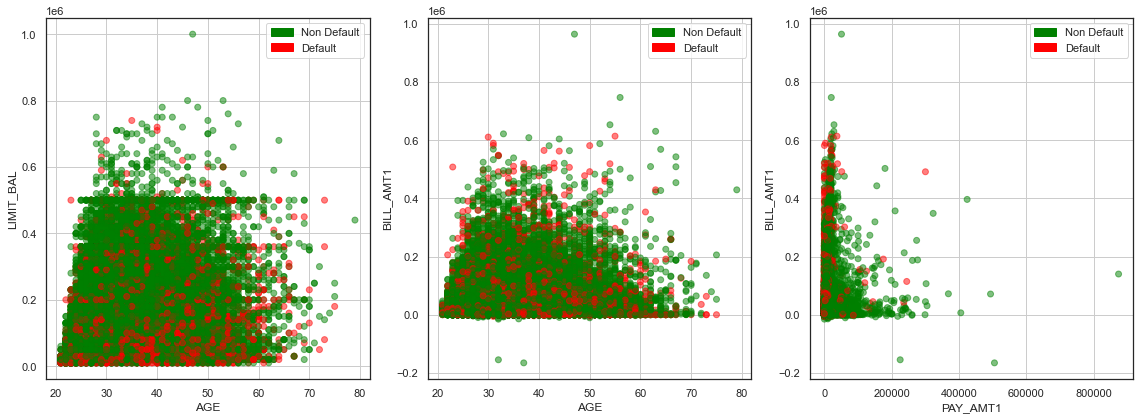

In [28]:
# Distribution of un-correlated features

fig, ax = plt.subplots(1,3, figsize= (16,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='green', label='Non Default')
pop_b = mpatches.Patch(color='red', label='Default')
colors=['green', 'red']

ax[0].scatter(AGE, LIMIT_BAL, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('AGE')
ax[0].set_ylabel('LIMIT_BAL')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(AGE, BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('AGE')
ax[1].set_ylabel('BILL_AMT1')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(PAY_AMT1,BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('PAY_AMT1')
ax[2].set_ylabel('BILL_AMT1')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()
plt.show()

Charts of non-strongly correlated features are shown above.

In order to remove correlated features some dimensionality reduction techinques will be performed during the Data Preprocessing phase

<a id='boxplot'></a>
### 2.4 Boxplot

Finally, the boxplots for each of the numerical features are plotted in order to have a further look at the distribution and to eventually spot outliers (i.e. “bad” data that either has been miscomputed or is strongly exceptional wrt expected range). 

A boxplot represents a 5-number summary of data:

- 1st quartile: the twenty-fifth percentile;
- median (or 2nd quartile): the middle value of a dataset;
- 3rd quartile: the seventy-fifth percentile;
- minimum: the lowest data point excluding any outliers;
- maximum: the largest data point excluding any outliers.

In the boxplot we define the Interquartile range (IQR) as is the distance between the upper and lower quartiles:

\begin{equation}
IQR = Q_3 - Q_1 = q(0.75) - q(0.25)
\end{equation}

Furthermore, through them it is possible to detect outliers presence (i.e. the single points), with the following rule: every sample located beyond  𝑄1−1.5x𝐼𝑄𝑅  and  𝑄3+1.5x𝐼𝑄𝑅  is considered an outlier.

### Min-Max scaling for numerical variables

As mentioned above, input variables may have different units so different scales and magnitude; for this reason before drawing a boxplot, a `MinMaxScaler()` is applied in order to scale the features between a range $(0, 1)$. The basic idea behind this rescaling technique is that for every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.<br>
The transformation is given by the following formula:

\begin{equation}
X_{scaled} = \frac{(X - X_{min})}{(X_{max} - X_{min})}
\end{equation}

where $X_{min}$ is the minimum value on the column and $X_{max}$ is the maximum value on the column.

This transformation is applied on <b>numerical features</b> only as the categorical variables has been already transformed into one-hot vectors, that rescale the categorical variable in the range $(0,1)$.

Text(0.5, 1.0, 'Boxplots')

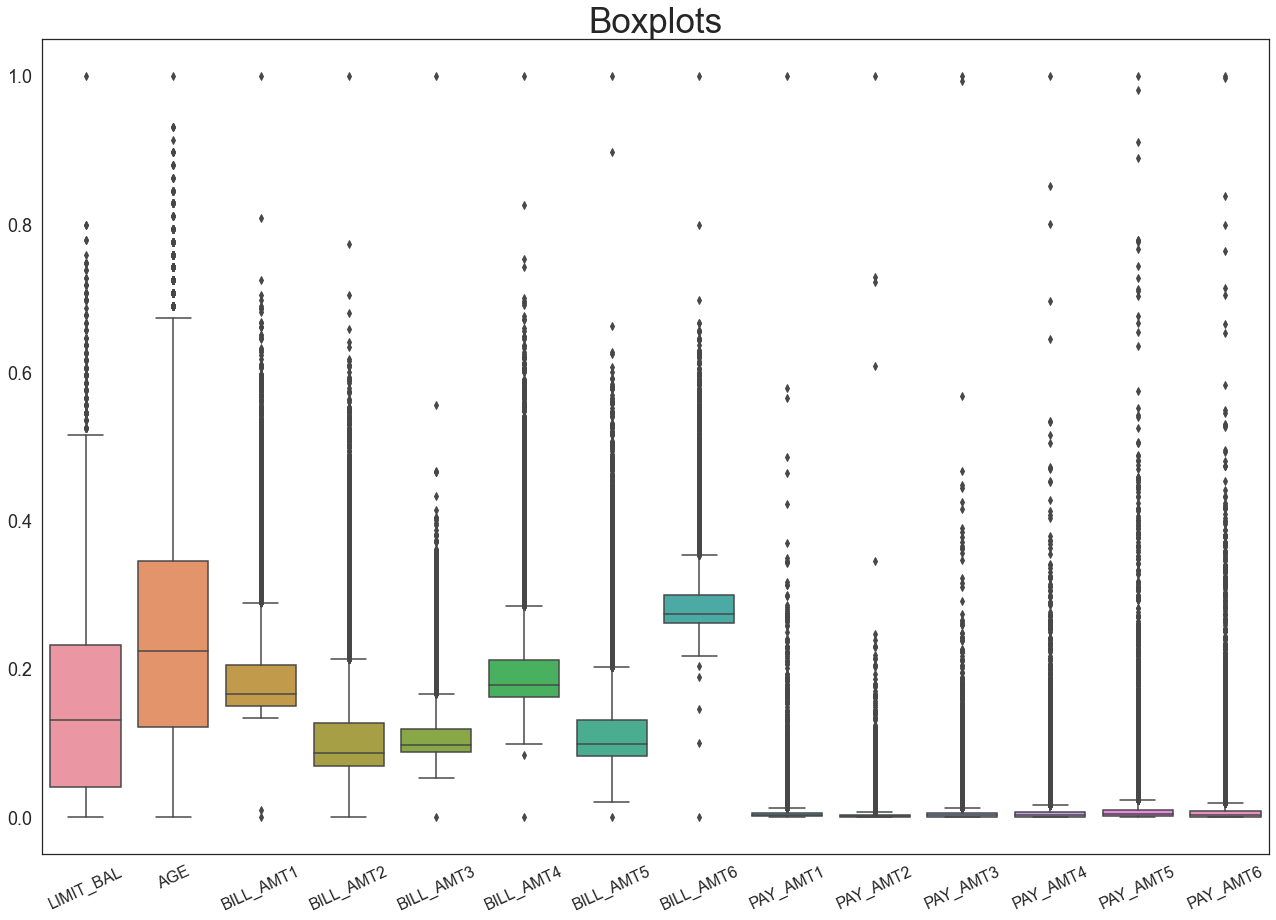

In [29]:
# MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['LIMIT_BAL'] = scaler.fit_transform(data['LIMIT_BAL'].values.reshape(-1, 1))
data['AGE'] = scaler.fit_transform(data['AGE'].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    data['PAY_' + str(i)] = scaler.fit_transform(data['PAY_' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    data['BILL_AMT' + str(i)] = scaler.fit_transform(data['BILL_AMT' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    data['PAY_AMT' + str(i)] = scaler.fit_transform(data['PAY_AMT' + str(i)].values.reshape(-1, 1))
    
# BOXPLOT
cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
        'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

fig=plt.figure(1, figsize=(22,15))
ax=fig.add_subplot(111)
sns.boxplot(data=data[cols])
plt.xticks(np.arange(0,14), labels=cols, rotation=25, fontsize=16)
plt.yticks(fontsize=18)
plt.title('Boxplots', fontsize= 35)

Using the boxplots we can identifty many outliers. It is possible to change the multiplicative coefficient to decide the threshold to overcome in order to be considered an outlier, but even if we double the coefficent, then also the possible outliers are more than 4000.

Due to lack of domain knowledge and the very high number of identifiable outliers, no samples have been discarded as outliers.

<a id='data_preproc'></a>
## 3. Data Preprocessing
<a id='one_hot'></a>
### 3.1 One-hot encoding for categorical variables

An integer encoding may impose some ordinal relationship between categorical variables that does not exist, for this reason **one-hot encoding** is performed.
Categorical variable such as `SEX`, `MARRIAGE` and `EDUCATION` are turned into one-hot encoded variables in order to remove any order which in this case have no meaning. 

One-hot encoding is a representation of categorical variables as binary vectors. First, it requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [30]:
# Set 'category' type to categorical attributes
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
  data[att] = data[att].astype('category')

# One-hot encoding
data=pd.concat([pd.get_dummies(data['SEX'], prefix='SEX'),
                pd.get_dummies(data['EDUCATION'], prefix='EDUCATION'), 
                pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE'),
                data],axis=1)

# Drop original columns
data.drop(['EDUCATION'],axis=1, inplace=True)
data.drop(['SEX'],axis=1, inplace=True)
data.drop(['MARRIAGE'],axis=1, inplace=True)
data.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,0,1,0,1,0,0,1,0,0,0.010101,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,0,1,0,1,0,0,0,1,0,0.111111,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,0,1,0,1,0,0,0,1,0,0.080808,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,0,1,0,1,0,0,1,0,0,0.040404,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,1,0,0,1,0,0,1,0,0,0.040404,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


<a id='feat_scaling'></a>
### 3.2 Feature Scaling

As previously explained, a `MinMaxScaler()` has been already applied to all the numerical features.

<a id='feat_sel'></a>
### Feature Selection
On top of feature transformation, the data preprocessing phase often includes a feature selection step, where the attributes from the given dataset are carefully analysed and finally selected to feed the machine learning algorithm. <br> As previously seen in the correlation matrix and with scatter plots, some features in this dataset are strongly linearly correlated, so it is not meaningful to keep all of them because they may contain redundant information. In this way, features with a Pearson coefficient $\rho \geqslant 0.92$ with other predictors should be discarded. 

In particular, at this step the following features are removed: `BILL_AMT2`, `BILL_AMT3`, `BILL_AMT4`, `BILL_AMT5`, `BILL_AMT6`.

In [31]:
# Remove features with correlation coefficent >= 0.92

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.92)]

print("Dropping:", to_drop)
data= data.drop(data[to_drop], axis = 1)

Dropping: ['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


<a id='train-test'></a>
### 3.3 Train-test split
The dataset is divided in training set, validation set and test set, with the 70% for training set and 15% each for validation set and test set. Given the imbalance fashion in the original dataset a **stratified sampling** strategy has been applied during the split, so that the proportion of defaulters/non-defaulters clients in each of the final sets would approximately be the same as the initial one. This approach is desirable every time we have a highly *unbalanced dataset* as in our case. 

*Note that the split has been randomly generated but kept the same for all the following methods, in order to make evaluations statistically meaningful and provide consistent results among the different classifiers.*
```python
random_state = 40
```

In [32]:
# Separating features and target
y = data.Default     # Target variable: default=1 or non-default=0
X = data.drop('Default', axis = 1, inplace = False)

In [33]:
# Checking data set dimensions
print(X.shape)
print("Number of samples:", X.shape[0])
print("Number of attributes:", X.shape[1])

(29601, 24)
Number of samples: 29601
Number of attributes: 24


In [34]:
from sklearn.model_selection import train_test_split

# First splitting the data into 70:30 for Training & validation-testing
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

# Next splitting the validation-testing data equally among validation set and test set
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=40, stratify=y_valtest)

In [35]:
# Checking dimensions

print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(X_test))

print("Training set:")
print(f" + Non-defaulters (y=0): {len(y_train[y_train==0])}")
print(f" + Defaulters (y=1):\t {len(y_train[y_train==1])}")

print("Validation set:")
print(f" + Non-defaulters (y=0): {len(y_val[y_val==0])}")
print(f" + Defaulters (y=1):\t {len(y_val[y_val==1])}")

print("Test set:")
print(f" + Non-defaulters (y=0): {len(y_test[y_test==0])}")
print(f" + Defaulters (y=1):\t {len(y_test[y_test==1])}")

(20720, 24)
(4440, 24)
(4441, 24)
Training set:
 + Non-defaulters (y=0): 16097
 + Defaulters (y=1):	 4623
Validation set:
 + Non-defaulters (y=0): 3449
 + Defaulters (y=1):	 991
Test set:
 + Non-defaulters (y=0): 3450
 + Defaulters (y=1):	 991


<a id='dim_red'></a>
### 3.4 Dimensionality reduction

As already mentioned above, generally speaking it is not always a good idea to propagate in the algorithms all the samples' attributes. The main reasons for which the dimensionality reduction is required are the following:
- high dimensional data may negatively affect the algorithms perfomances (i.e. high computational costs);
- high dimensionality might lead to poor generalization;
- can be used for interpretability of the data (e.g. for illustration purposes).

Moreover, different machine learning algorithms suffer from the ***curse of dimensionality*** problem: if there are more features than observations the risk of massively overfitting the model becomes really high. Then, too many dimensions causes every observation in the dataset to appear equidistant from all the other, and this is effectively a problem when used distance-based algorithms (such as K-Nearest Neighbors), because if the distances are all approximately equal, then the observation appear equally alike (as well as equally different), making the algorithm perfomances meaningless.

We will be using Principal Component Analysis(PCA) for dimentionality reduction.

Actual number of components: 24


,Cumulative Variance Explained
1,0.300859
2,0.570145
3,0.793681
4,0.905355
5,0.948153
6,0.959151
7,0.968004
8,0.975545
9,0.982276
10,0.986408


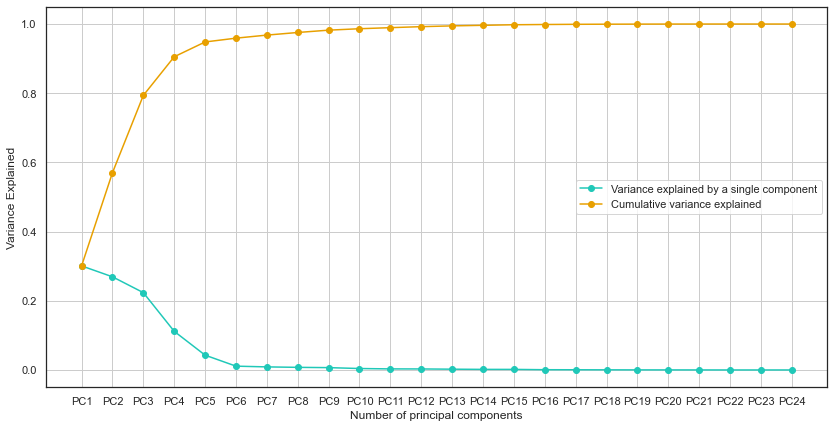

In [36]:
# Using Principal Component Analysis

from sklearn.decomposition import PCA
from IPython.display import display

print(f"Actual number of components: {len(X_train.columns.values)}")

n_pc = len(X_train.columns.values)

pca = PCA(n_components=n_pc)
pca.fit(X_train)

cve = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_), index=range(1,25), columns=['Cumulative Variance Explained'])
display(cve)

fig=plt.figure(1, figsize=(14,7))
plt.grid(visible=True, which='major', axis='both')
plt.plot(pca.explained_variance_ratio_, marker='o', color='#20c8b8')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='#e8a000')
plt.xticks([n for n in range(0,n_pc)], [ "PC"+str(n) for n in range(1,n_pc+1)])
plt.legend(["Variance explained by a single component", "Cumulative variance explained"])
plt.xlabel('Number of principal components')
plt.ylabel('Variance Explained')
plt.savefig("PCA");

Explained variance ratio of each principle component, together with the
cumulative variance explained as more dimensions are considered.

In [37]:
n_pc = 12
pca = PCA(n_components=n_pc)
pca.fit(X_train)

X_12d_train= pd.DataFrame(pca.transform(X_train))
X_12d_val = pd.DataFrame(pca.transform(X_val))
X_12d_test = pd.DataFrame(pca.transform(X_test))

X_12d_train.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_12d_val.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_12d_test.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
X_12d_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.745009,-0.794387,0.480174,-0.179749,-0.046782,-0.060648,-0.056245,0.100175,0.106458,0.137671,-0.024644,0.148779
1,0.118093,-0.685791,-0.752806,-0.034273,-0.362492,0.404577,0.147126,-0.348072,-0.055140,-0.151573,-0.003642,0.076561
2,0.585630,0.640388,-0.946492,-0.032042,0.116640,-0.128801,0.031892,-0.036240,-0.105381,-0.005068,0.003616,-0.087108
3,0.740800,-0.798092,0.501677,-0.193512,-0.277571,-0.087531,0.079737,-0.054109,0.058706,0.032278,-0.002705,-0.009604
4,0.313449,-0.672157,0.066053,1.082016,-0.485242,0.156147,0.100522,-0.187829,0.107419,0.027073,-0.001979,-0.011713


The graph above is relative to the **proportion of explained variance**: the green line represents the proportion of variance explained by each principal component. While the orange line instead is the cumulative amount of proportion of variance explained (i.e. the sum of the single variance explained by the principal components on the left).

This graph is useful to take decision regarding the number of components to keep. The following table report some interesting values for the number of components. 

| Number of PCs | Cumulative Variance Explained |
|:-------------:|:-------------------------------:|
|       4       |               90.5 %             |
|       6       |               95.9 %             |
| 8             | 97.5 %                           |
| 12            | 99.2 %                          |

For example, the first 12 PCs are able to capture almost the whole variance (99.2%) of the data points and for this reason we decided to keep these number.

*Note that PCA is applied based only on the training data in order to avoid any leaking the information of test data.*

In [38]:
X_train = X_12d_train
X_val = X_12d_val
X_test = X_12d_test

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(20720, 12)
(4440, 12)
(4441, 12)


<a id='eval_methods'></a>
## 4. Classification algorithms

In this section a description of the algorithms used is presented. For each of them, different hyperparameters are tuned in order to find the ones performing best, and once found, the model trained with them is used to predict class labels on test data combining different data preprocessing techniques presented above in order to spot some performances differences.
The best configuration is selected by comparing the different metrics, principally based on the *f1-score* because accuracy on unbalanced dataset may return high values even if the minority class is not correcly classified.

The algorithms considered are:
- Logistic Regression (Primary -> Since it was mentioned in the project objective)
- Artificial Neural Network (Alternate -> Mentioned in the project objective to compare Logistic Regression model with any other algorithm of choice)

<a id='eval_methods'></a>
### 4.1 Evaluation methods
Even though learning theory guarantees to reach a probably approximately correct model, in practice it is often needed to perform an actual evaluation of the model to check how well it’s performing. This is generally done by splitting the original dataset into two parts, a training set and a test set, so that the model can be trained on the training samples only and be evaluated on previously unseen data. This technique is referred to as ***Holdout***.

Instead, ***Cross Validation*** is a resampling method that allows to repeteadly drawing samples from a training set, in order to have a better estimate of the evaluation score used.

With the cross-validation technique we aim to verify if the model is able predict labels for data points that it hasn't seen so far.
The complete dataset is divided into $k$ subsets (folds):
- $k-1$ folds will be used to train the model, all togheter compose the *training set*;
- one fold composes the *validation set*, on which we evaluate the performance of the model.

A combination of holdout and cross validation can be used when also dealing with a validation set (*k-fold cross validation*). So after having divided the dataset in a stratify way into training and test set, the training part is again splitted into training and validation set (even in this case with `stratify=True`).

<a id='eval_metrics'></a>
### 4.2 Evaluation metrics
In a classification scenario, the model can be evaluated by computing different metrics. In order to better understand these metrics could be useful to get some fundamentals:

|            | Predicted (1) | Predicted (0) |
|:----------:|:-------------:|:-------------:|
| **Actual (1)** |       TP      |       FN      |
| **Actual (0)** |       FP      |       TN      |

- *True Positive (TP)*: samples for which the prediction is positive and the true class is positive
- *False Positive (FP)*: samples for which the prediction is positive but the true class is negative
- *True Negative (TN)*: samples for which the prediction is negative and the true class is negative
- *False Negative (FN)*: samples for which the prediction is negative but the true class is positive


Some of the most popular metrics are:

- ***Accuracy***: ratio of correct predictions over the total number of data points classified

\begin{equation}
Accuracy = \frac{\#\ correctly\ classified\ samples}{total\ number\ of\ samples\ tested}=\frac{TP+TN}{TP+FP+TN+FN}
\end{equation}
 
- ***Precision***: measures the fraction of correct classified instances among the ones classified as positive. Precision is an appropriate measure to use when the aim is to minimize *false positives*.


- ***Recall***:  it measures how many of the actual positives a model capture through labelling it as True Positive.It is an appropriate score when the aim is to minimize false negatives


- ***F1 Score***:  F1 Score is the harmonic mean of precision and recall. It gives a combined idea about Precision and Recall metrics.

**In this analysis we focus our attention on detecting which customers may be defaults clients, and the positive class captures the attention of the classifier. Our overall focus will be on reducing False Negatives or Type II Error**(Customer's who are likely to default but are misclassified as non-defaulting cutomers)**, however, since we also want to maximize the profit of the bank so we have to maintain a balance with not making too many misclassifications of the negative class as well, therefore, we will foucus on the overall model's F1-score as well to find the best configuration for each model.**

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.pipeline import make_pipeline

## Baseline Model

Before we begin building different model, let's build a simple dummy baseline model first. The baseline model will simply predict every instance as the majority class. Since, in our dataset the majority class is 0 (Non-default customers) so the baseline model will simply predict every instance to be of class 0.

In [40]:
# Creating a dummy baseline model that predicts every instance to be of the majority class
# We will use the baseline model on the Test dataset

dummy_preds = np.zeros(shape=y_test.shape)

baseline_cm = confusion_matrix(y_test, dummy_preds);
baseline_f1 = f1_score(y_test, dummy_preds, average='macro')
print("Test F1 score: ", baseline_f1)

print("Test set:\n", classification_report(y_test, dummy_preds));
print("\nConfusion Matrix:\n\n", baseline_cm)

Test F1 score:  0.4372069446204537
Test set:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      3450
           1       0.00      0.00      0.00       991

    accuracy                           0.78      4441
   macro avg       0.39      0.50      0.44      4441
weighted avg       0.60      0.78      0.68      4441


Confusion Matrix:

 [[3450    0]
 [ 991    0]]


C:\Users\arjba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arjba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arjba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression Model

In [41]:
# Stratified K-Fold Cross Validation
# Pipeline

parameter_grid = {"C":[0.0001, 0.001, 0.01, 0.1, 1, 10]}

clf_name = 'logisticregression__'
classifier = LogisticRegression()

new_params = {clf_name + key: parameter_grid[key] for key in parameter_grid}

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)

imba_pipeline = make_pipeline(classifier)

SCORE = 'f1' 
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring=SCORE, return_train_score=True)

grid_imba.fit(X_train, y_train)

print(f"Best configuration found for {classifier}:")
print(grid_imba.best_params_)
print(f"\nValidation {SCORE} score:   {grid_imba.best_score_}")

Best configuration found for LogisticRegression():
{'logisticregression__C': 10}

Validation f1 score:   0.23634535672799378


Validation F1 score:  0.5626096652470565

Validation set:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      3449
           1       0.74      0.14      0.24       991

    accuracy                           0.80      4440
   macro avg       0.77      0.57      0.56      4440
weighted avg       0.79      0.80      0.74      4440



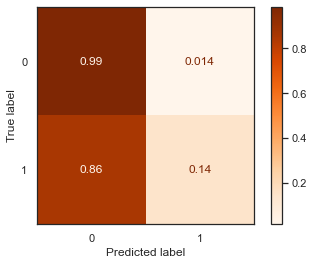

In [42]:
# Re-train logistic regression model with the best parameters

clf = classifier
clf.fit(X_train, y_train)
y_pred_val = clf.predict(X_val)

# Checking for validation set

print("Validation F1 score: ", f1_score(y_val, y_pred_val, average='macro'))
print("\nValidation set:\n", classification_report(y_val, y_pred_val))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val, cmap='Oranges', normalize='true');

Test F1 score:  0.56
Test set:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      3450
           1       0.70      0.14      0.24       991

    accuracy                           0.80      4441
   macro avg       0.75      0.56      0.56      4441
weighted avg       0.78      0.80      0.74      4441



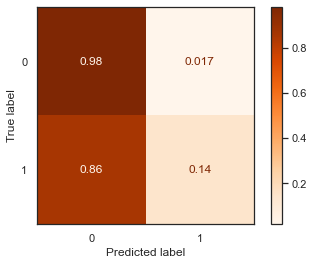

In [43]:
# Checking for test set

y_pred_test = clf.predict(X_test)
lr_default_thr_cm = confusion_matrix(y_test, y_pred_test)
lr_default_thr_f1 = round(f1_score(y_test, y_pred_test, average='macro'),2)
print("Test F1 score: ", lr_default_thr_f1)
print("Test set:\n", classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Oranges', normalize='true');

### Observations

The Logistic Regression model used above with default classification threshold of 0.5 is not performing well for the minority class(Target = 1).
We can see that the **Recall score for the minority class is 0.14** which is poor considering that in our business problem not being able to predict prospective would-be Defaulting customers will increase the risk of the business and increase potential for loss. So it's critical that our model must improve on it's Recall score pertaining to the minority class. 

> One point to note here is that since we are not just considering the **"Risk"** factor alone but the **"Profitability"** of the business is also under consideration as per the given objective, therefore, we must not also miss-out on potential non-defaulting customers for granting credit as it will affect the profitability of the business if we do so. Therefore, a fine balance between the two objectives must be met.

### Using Threshold-moving for imbalanced data classification

The decision for converting a predicted probability or scoring into a class label is governed by a parameter referred to as the “decision threshold,” “discrimination threshold,” or simply the “threshold.” The default value for the threshold is 0.5 for normalized predicted probabilities or scores in the range between 0 or 1.

For example, on a binary classification problem with class labels 0 and 1, normalized predicted probabilities and a threshold of 0.5, then values less than the threshold of 0.5 are assigned to class 0 and values greater than or equal to 0.5 are assigned to class 1.

* Prediction < 0.5 = Class 0
* Prediction >= 0.5 = Class 1

For classification problems that have a severe class imbalance, the default threshold of 0.5 used by Logistic Regression can result in poor performance. As such, effective approach to improving the performance of a classifier that predicts probabilities on an imbalanced classification problem is to tune the threshold used to map probabilities to class labels.

**Approach used:** We had divided our original dataset into three sets: Training set(70%), Validation set(15%), Test set(15%). We will now use our Validation set to find the optimum Threshold value, and then apply the optimum threshold for classification on the unseen Test set to assess the model performance.

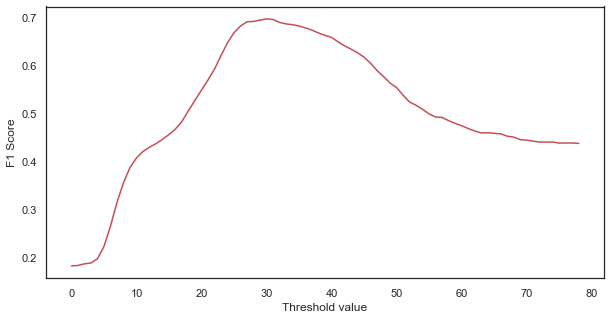


The Maximum F1 score is 0.6961491819311776 for the threshold 0.31 where the graph peaked


In [44]:
# Determining the best threshold value

# We will loop over different threshold values in the range [0,1] and measure the F1 score over the validation set
# Then will be take the threshold value that give the best F1 score across various threshold values

f1_scores={}

for threshold in np.linspace(0,1,101):    
    
    y_preds_val = np.zeros(y_val.shape)
    y_pred_prob_val = clf.predict_proba(X_val)[:,1]    

    for i,p in enumerate(y_pred_prob_val):
        if p>=threshold:
           y_preds_val[i]=1 

    fs = f1_score(y_val, y_preds_val, average='macro')
    f1_scores[fs] = threshold
    
plt.figure(figsize=(10,5))
plt.plot(f1_scores.keys(), c='r')
plt.xlabel("Threshold value")
plt.ylabel("F1 Score")
plt.show()

best_threshold = f1_scores[max(f1_scores.keys())]  # Get the best threshold value corresponding to the max F1 score
print(f"\nThe Maximum F1 score is {max(f1_scores.keys())} for the threshold {best_threshold} where the graph peaked")

Validation F1 score:  0.6961491819311776

               precision    recall  f1-score   support

           0       0.85      0.91      0.88      3449
           1       0.59      0.45      0.51       991

    accuracy                           0.81      4440
   macro avg       0.72      0.68      0.70      4440
weighted avg       0.79      0.81      0.80      4440



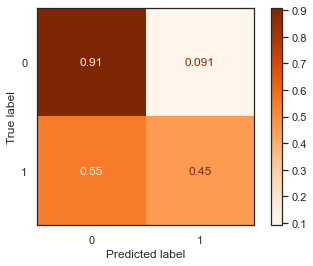

In [45]:
# Using the best threshold value now

y_pred_prob_val = clf.predict_proba(X_val)[:,1]
y_preds_val = np.zeros(y_pred_prob_val.shape)

for i,p in enumerate(y_pred_prob_val):
    if p>=best_threshold:
       y_preds_val[i]=1 

print("Validation F1 score: ", f1_score(y_val, y_preds_val, average='macro'))
print("\n", classification_report(y_val, y_preds_val))

ConfusionMatrixDisplay.from_predictions(y_val, y_preds_val, cmap='Oranges', normalize='true');

Test F1 score:  0.71

               precision    recall  f1-score   support

           0       0.86      0.91      0.88      3450
           1       0.60      0.47      0.53       991

    accuracy                           0.81      4441
   macro avg       0.73      0.69      0.71      4441
weighted avg       0.80      0.81      0.80      4441



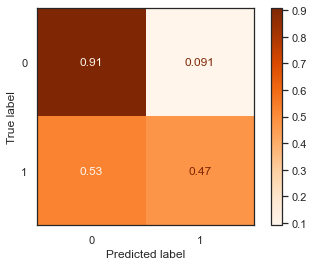

In [46]:
# Checking performance on Test set

y_pred_prob_test = clf.predict_proba(X_test)[:,1]
y_preds_test = np.zeros(y_pred_prob_test.shape)

for i,p in enumerate(y_pred_prob_test):
    if p>=best_threshold:
       y_preds_test[i]=1 

    
lr_best_thr_cm = confusion_matrix(y_test, y_preds_test)    
lr_best_thr_f1 = round(f1_score(y_test, y_preds_test, average='macro'),2)
print("Test F1 score: ", lr_best_thr_f1)
print("\n", classification_report(y_test, y_preds_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_preds_test, cmap='Oranges', normalize='true');

### Weighted Neural Network

Neural networks are trained using the backpropagation algorithm that involves calculating errors made by the model on the training dataset and updating the model weights in proportion to those errors. The limitation of this method of training is that examples from each class are treated the same, which for imbalanced datasets means that the model is adapted a lot more for one class than another.

The backpropagation algorithm can be updated to weigh misclassification errors in proportion to the importance of the class, referred to as weighted neural networks or cost-sensitive neural networks. This has the effect of allowing the model to pay more attention to examples from the minority class than the majority class in datasets with a severely skewed class distribution.

A large error weighting can be applied to those examples in the minority class as they are often more important in an imbalanced classification problem than examples from the majority class.

* Large Weight: Assigned to examples from the minority class.
* Small Weight: Assigned to examples from the majority class.

This modification to the neural network training algorithm is referred to as a **Weighted Neural Network** or **Cost-Sensitive Neural Network**.

Typically, careful attention is required when defining the costs or “weightings” to use for cost-sensitive learning. However, for imbalanced classification where only misclassification is the focus, the weighting can use the inverse of the class distribution observed in the training dataset.

The Tensorflow Keras deep learning library provides support for class weighting. The fit() function that is used to train Keras neural network models takes an argument called **'class_weight'**. This argument allows us to define a dictionary that maps class integer values to the weights to apply to each class.

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
seed(40)
tf.keras.utils.set_random_seed(40)

# define the neural network model

n_input = X_train.shape[1]

model = Sequential([
    Dense(32, input_dim=n_input, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')    
], name="Weighted_Neural_Network")

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam)
model.summary()

Model: "Weighted_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Wighted Neural Network

weights = {0:1, 1:4}
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    mode="auto",
    restore_best_weights=True
)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    class_weight=weights, epochs=50, callbacks=[es], verbose=1)

# Predict using the trained model
yhat = model.predict(X_test)

Epoch 1/50
648/648 [==============================] - 3s 3ms/step - loss: 1.0695 - val_loss: 0.6407
Epoch 2/50
648/648 [==============================] - 2s 3ms/step - loss: 1.0051 - val_loss: 0.6229
Epoch 3/50
648/648 [==============================] - 2s 3ms/step - loss: 0.9892 - val_loss: 0.6039
Epoch 4/50
648/648 [==============================] - 2s 3ms/step - loss: 0.9810 - val_loss: 0.6030
Epoch 5/50
648/648 [==============================] - 2s 3ms/step - loss: 0.9750 - val_loss: 0.6023
Epoch 6/50
648/648 [==============================] - 2s 3ms/step - loss: 0.9691 - val_loss: 0.5920
Epoch 7/50
648/648 [==============================] - 2s 3ms/step - loss: 0.9660 - val_loss: 0.6321
Epoch 8/50
648/648 [==============================] - 2s 3ms/step - loss: 0.9632 - val_loss: 0.5888
Epoch 9/50
648/648 [==============================] - 2s 3ms/step - loss: 0.9611 - val_loss: 0.5908
Epoch 10/50
648/648 [==============================] - 2s 3ms/step - loss: 0.9595 - val_loss: 0.6122

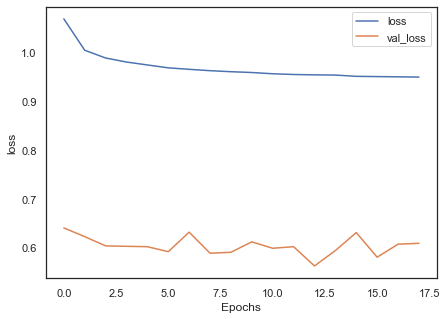

Test F1 score:  0.71

               precision    recall  f1-score   support

           0       0.88      0.84      0.86      3450
           1       0.52      0.60      0.55       991

    accuracy                           0.79      4441
   macro avg       0.70      0.72      0.71      4441
weighted avg       0.80      0.79      0.79      4441



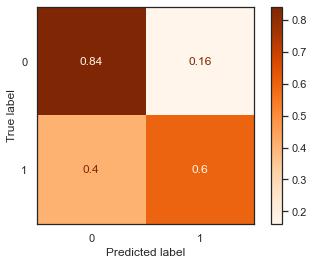

In [49]:
def plot_graphs(history, metric):
    
    plt.figure(figsize=(7,5))
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "loss")

nn_cm = confusion_matrix(y_test, np.around(yhat))
nn_f1 = round(f1_score(y_test, np.around(yhat), average='macro'),2)
print("Test F1 score: ", nn_f1)
print("\n", classification_report(y_test, np.around(yhat)))
ConfusionMatrixDisplay.from_predictions(y_test, np.around(yhat), cmap='Oranges', normalize='true');

## Comparing the different models created and drawing final conclusions

In [50]:
# Let's compare the performance all the models created so far on the Test dataset

# Creating a list of all the confusion matrices of the different models
models_cm = [baseline_cm, lr_default_thr_cm, lr_best_thr_cm, nn_cm]

# Now we will create a list of normalized values of the metrics across the True/Actual class labels
norm_metrics = []
for cm in models_cm:
    
    f_row = cm[0]
    f_row = f_row/np.sum(cm[0])
    norm_metrics.append(round(f_row[0],2))
    norm_metrics.append(round(f_row[1],2))
    
    s_row = cm[1]
    s_row = s_row/np.sum(cm[1])
    norm_metrics.append(round(s_row[0],2))
    norm_metrics.append(round(s_row[1],2))

# Now we will convert the list to an array and reshape it into 5 by 4 where each row has the metrics of each model
metrics_arr = np.array(norm_metrics)
metrics_arr = metrics_arr.reshape((4,4))
print("Array in which each row contains normalized values of metrics of each model-> TN, FP, FN, TP respectively:")
metrics_arr

Array in which each row contains normalized values of metrics of each model-> TN, FP, FN, TP respectively:


array([[1.  , 0.  , 1.  , 0.  ],
       [0.98, 0.02, 0.86, 0.14],
       [0.91, 0.09, 0.53, 0.47],
       [0.84, 0.16, 0.4 , 0.6 ]])

In [51]:
# Creating a DataFrame with the above array and placing proper headers

index = ['Dummy Baseline Model',
         'Logistic Regression with default threshold',
         'Logistic Regression with optimum threshold',
         'Weighted Neural Network']
        
columns = ['True Negative','False Positive','False Negative','True Positive']

model_metrics = pd.DataFrame(metrics_arr, index=index, columns=columns)

models_f1 = [round(baseline_f1,2), round(lr_default_thr_f1,2), round(lr_best_thr_f1,2), round(nn_f1,2)]
model_metrics['F1 Score'] = models_f1
model_metrics

,True Negative,False Positive,False Negative,True Positive,F1 Score
Dummy Baseline Model,1.00,0.00,1.00,0.00,0.44
Logistic Regression with default threshold,0.98,0.02,0.86,0.14,0.56
Logistic Regression with optimum threshold,0.91,0.09,0.53,0.47,0.71
Weighted Neural Network,0.84,0.16,0.40,0.60,0.71


## Final Conclusions

**From the table above, we can see the performance of the three models that we have created in this project. In terms of the F1 score alone, the Logistic Regression model with moving-threshold approach and the Weighted Neural Network model both perform the best with score of 0.71 but if we look at the False Negatives (Type II Error) of this model, it doesn't perform that great compared to the Weighted Neural Network model. Remember, here the False Negatives are customers who are likely to Default but are being incorrectly classified as non-defaulting customers by the model. These misclassifications pose a risk to the bank and therefore a good model for this kind of business problem should perform well in identifying would-be defaulting customers. We are also interested in keeping False Positives low because we don't want our model to miss-out on good customers by incorrectly classifying them as would-be defaulting customers, as this would mean missing out on profits by denying credit to good customers. Overall, we should select a model that is low on False Negatives and not too high on False Positives thus showing a balance between the two aspects.** 

**In this context, the Weighted Neural Network seems to be the most apt as it is the best performing model in terms of minimizing False Negatives and doing well on keeping False Positives at reasonable levels. Thus, this model is performing best in identifying customers who are likely to default compared to other models and also performing reasonably well in identifying customers who are unlikely to default (credit-worthy customers).**